## Observations and Insights 

* 1 
Capomulin and Ramicane have the most timepoints. We can infer from this that they are the most effective at minimising the harm of the tumours as more mice are living longer and as such both not dying due to their tumour and also generating more timepoints. 


* 2
There is a positive correlation between the weight of a mouse and the average weight of it's tumour. This is likely due to a larger mouse having a larger tumour, proporitonal to the mouses' size. 


* 3 

The distrubituon of male and female mice across each drug was almost identical. This allowed the drug regimen averages to be reliable across both sexes of mice and allow our data and testing to be as fair and accurate as possible. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
joined_df = mouse_metadata.merge(study_results, on="Mouse ID", how="outer",)
joined_df["Tumor Volume (mm3)"] = pd.to_numeric(joined_df["Tumor Volume (mm3)"])
# Display the data table for preview
joined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice
len(joined_df["Mouse ID"].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

joined_df["mouse/timepoint dupe"] = joined_df.duplicated(subset=["Mouse ID", "Timepoint"])

dupe_mouse = joined_df["Mouse ID"].loc[joined_df["mouse/timepoint dupe"] == True].unique()
dupe_freq = joined_df["Mouse ID"].loc[joined_df["mouse/timepoint dupe"] == True].value_counts()

dupe_summary = pd.DataFrame({
    "Mouse ID": dupe_mouse,
    "Number of Duplicate Data": dupe_freq
})

dupe_mice_summary = dupe_summary.set_index("Mouse ID")
dupe_mice_summary

,Number of Duplicate Data
Mouse ID,
g989,5


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mice_data = joined_df[joined_df["Mouse ID"].isin(dupe_mouse)]
dupe_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,mouse/timepoint dupe
908,g989,Propriva,Female,21,26,0,45.000000,0,False
909,g989,Propriva,Female,21,26,0,45.000000,0,True
910,g989,Propriva,Female,21,26,5,48.786801,0,False
911,g989,Propriva,Female,21,26,5,47.570392,0,True
912,g989,Propriva,Female,21,26,10,51.745156,0,False
913,g989,Propriva,Female,21,26,10,49.880528,0,True
914,g989,Propriva,Female,21,26,15,51.325852,1,False
915,g989,Propriva,Female,21,26,15,53.442020,0,True
916,g989,Propriva,Female,21,26,20,55.326122,1,False
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_vs_cancer  = joined_df.drop(joined_df[joined_df["Mouse ID"].isin(dupe_mouse)].index)
mice_vs_cancer = mice_vs_cancer.drop("mouse/timepoint dupe", axis = 1)
mice_vs_cancer

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
len(mice_vs_cancer["Mouse ID"].unique())

248

## Summary Statistics

In [8]:
groupby_drug = mice_vs_cancer.groupby("Drug Regimen")
gb_regimen_mean = groupby_drug["Tumor Volume (mm3)"].mean()
gb_regimen_median = groupby_drug["Tumor Volume (mm3)"].median()
gb_regimen_variance = groupby_drug["Tumor Volume (mm3)"].var()
gb_regimen_stdev = groupby_drug["Tumor Volume (mm3)"].std()
gb_regimen_sem = groupby_drug["Tumor Volume (mm3)"].sem()

gb_regimen_summary = pd.DataFrame({"Mean": gb_regimen_mean,
                                   "Median" : gb_regimen_median,
                                   "Variance" : gb_regimen_variance,
                                   "Standard Deviation" : gb_regimen_stdev,
                                   "Standard Error of the Mean" : gb_regimen_sem
                                  })

gb_regimen_summary.index.name = None
gb_regimen_summary

,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

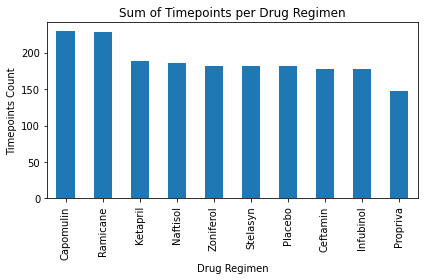

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_vs_cancer["Drug Regimen"].value_counts().plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints Count")
plt.title("Sum of Timepoints per Drug Regimen")
plt.tight_layout()

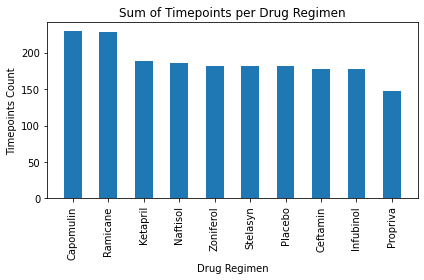

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_timepoint_values = mice_vs_cancer["Drug Regimen"].value_counts()
drug_timepoint_keys = mice_vs_cancer["Drug Regimen"].value_counts().keys().tolist()

plt.bar(drug_timepoint_keys, drug_timepoint_values, width=0.5)
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints Count")
plt.title("Sum of Timepoints per Drug Regimen")
plt.xticks(rotation=90)
plt.tight_layout()

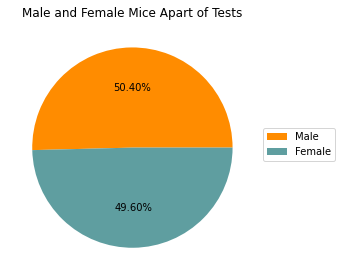

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_count = len(mice_vs_cancer["Mouse ID"].loc[mice_vs_cancer["Sex"] == "Male"].unique()) 
female_count = len(mice_vs_cancer["Mouse ID"].loc[mice_vs_cancer["Sex"] == "Female"].unique())

male_female_df = pd.DataFrame({'Count': [male_count,female_count]},
                  index=['Male', 'Female'])

colors = ["darkorange", "cadetblue"]
gender_pie = male_female_df.plot.pie(y="Count", colors = colors, autopct='%1.2f%%', labels=["",""])
plt.legend(loc="best",bbox_to_anchor=(1,0.6),labels=male_female_df.index)
plt.title("Male and Female Mice Apart of Tests")
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()

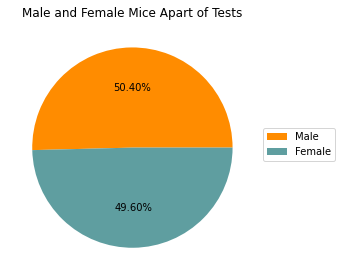

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["darkorange", "cadetblue"]
plt.pie([male_count,female_count], labels=["", ""], colors=colors, autopct="%1.2f%%")
plt.legend(loc="best",bbox_to_anchor=(1,0.6),labels=male_female_df.index)
plt.title("Male and Female Mice Apart of Tests")
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
mice_vs_cancer["endpoint"] = mice_vs_cancer.duplicated(subset=(["Mouse ID"]),keep="last")
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mice_endpoint = mice_vs_cancer[mice_vs_cancer["endpoint"] == False]

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quart_drug_df = mice_endpoint[(mice_endpoint["Drug Regimen"] == "Capomulin")|
                              (mice_endpoint["Drug Regimen"] == "Ramicane")|
                              (mice_endpoint["Drug Regimen"] == "Infubinol")|
                              (mice_endpoint["Drug Regimen"] == "Ceftamin")]


#calc quartiles, upper and lowers
quartiles = quart_drug_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
quartiles,lowerq,upperq,iqr,st.normaltest(quart_drug_df["Tumor Volume (mm3)"])

# Create empty list to fill with data
tumor_vol_tank = []
lowerq_list = []
upperq_list = []
iqr_list = []
norm_test_list = []
outlow_list = []
outhigh_list = []


#empty dataframe to store outliers
outliers_table = pd.DataFrame({})

for treat in treatments:
    #find tumour vol and append to list
    tumor_vol = quart_drug_df[quart_drug_df["Drug Regimen"] == treat]["Tumor Volume (mm3)"]
    tumor_vol_tank.append(tumor_vol)
    
    #find quartiles and append to list
    quartiles = quart_drug_df[quart_drug_df["Drug Regimen"] == treat]["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    outlow = (lowerq - (iqr * 1.5))
    outhigh = (upperq + (iqr * 1.5))
    norm_test = st.normaltest(quart_drug_df[quart_drug_df["Drug Regimen"] == treat]["Tumor Volume (mm3)"])
    
    #append to lists for printout
    lowerq_list.append(lowerq)
    upperq_list.append(upperq)
    iqr_list.append(iqr)
    norm_test_list.append(norm_test)
    outlow_list.append(outlow)
    outhigh_list.append(outhigh)
    
    #filter outliers into new dataset
    drugspec = quart_drug_df.loc[quart_drug_df["Drug Regimen"] == treat]
    outliers = drugspec.loc[(drugspec["Tumor Volume (mm3)"] < outlow) |(drugspec["Tumor Volume (mm3)"] > outhigh)]
    outliers_table = outliers_table.append(outliers)
    

quart_tested_count = len(quart_drug_df["Drug Regimen"])
quart_outlier_count = len(outliers["Drug Regimen"])


#print the information out so it can be reviewed


for norm in norm_test_list:
    drug = treatments[(norm_test_list.index(norm))]
    lowq = lowerq_list[(norm_test_list.index(norm))]
    highq = upperq_list[(norm_test_list.index(norm))]
    outl = round(outlow_list[(norm_test_list.index(norm))],2)
    outh = round(outhigh_list[(norm_test_list.index(norm))],2)
    total_mice = len(mice_endpoint[mice_endpoint["Drug Regimen"] == drug])
    outlier_count = len(outliers_table[outliers_table["Drug Regimen"] == drug])
    
    print(f"{drug} had the results: \n{norm}\nLower Bound: {lowq} (Outliers would be below: {outl})\nUpper Bound: {highq} (Outliers would be above: {outh})")
    print(f"{outlier_count} outliers found out of {total_mice} mice tested for {drug}.")
    
outliers_table

Capomulin had the results: 
NormaltestResult(statistic=0.6769417193133253, pvalue=0.7128595520583232)
Lower Bound: 32.37735684 (Outliers would be below: 20.7)
Upper Bound: 40.1592203 (Outliers would be above: 51.83)
0 outliers found out of 25 mice tested for Capomulin.
Ramicane had the results: 
NormaltestResult(statistic=0.7935996486079427, pvalue=0.6724686240354172)
Lower Bound: 31.56046955 (Outliers would be below: 17.91)
Upper Bound: 40.65900627 (Outliers would be above: 54.31)
0 outliers found out of 25 mice tested for Ramicane.
Infubinol had the results: 
NormaltestResult(statistic=2.3951209992443796, pvalue=0.3019298722629719)
Lower Bound: 54.04860769 (Outliers would be below: 36.83)
Upper Bound: 65.52574285 (Outliers would be above: 82.74)
1 outliers found out of 25 mice tested for Infubinol.
Ceftamin had the results: 
NormaltestResult(statistic=6.03709361334013, pvalue=0.04887218752049397)
Lower Bound: 48.72207785 (Outliers would be below: 25.36)
Upper Bound: 64.29983003 (Outl

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,endpoint
669,c326,Infubinol,Female,18,25,5,36.321346,0,False


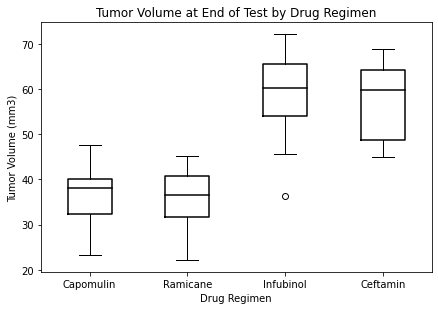

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

boxprops = dict(color="black",linewidth=1.5)
medianprops = dict(color="black",linewidth=1.5)


plt.boxplot(tumor_vol_tank, labels=treatments, boxprops=boxprops,medianprops=medianprops)
plt.tight_layout()
plt.title("Tumor Volume at End of Test by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show() 

## Line and Scatter Plots

(20.0, 48.0)

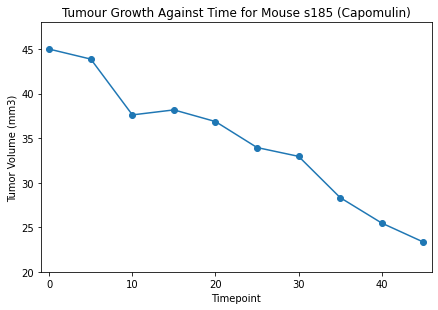

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#currnet plot shows all mice on the regimen
#how do I know which mouse to pick? 
capomulin_data = mice_vs_cancer[mice_vs_cancer["Mouse ID"] == "s185"]

line_x = capomulin_data["Timepoint"]
line_y = capomulin_data["Tumor Volume (mm3)"]

plt.plot(line_x, line_y, label="", marker="o")
plt.tight_layout()
plt.title("Tumour Growth Against Time for Mouse s185 (Capomulin)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(-1, 46)
plt.ylim(20,48)

C:\Users\James\AppData\Local\Temp/ipykernel_14384/900932644.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cap_mice_avg = pd.DataFrame(cap_mice_group["Weight (g)", "Tumor Volume (mm3)"].mean()).reset_index()


Text(0.5, 1.0, 'Average Tumour Volume Against Weight of Mouse')

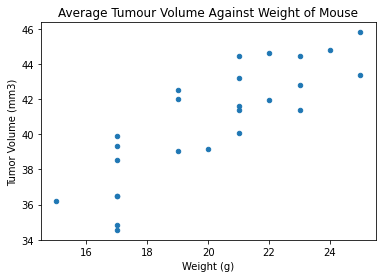

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#filter off Capomulin mice
cap_mice = mice_vs_cancer[mice_vs_cancer["Drug Regimen"] == "Capomulin"]


#Get average tumor size for each weight
cap_mice_group = cap_mice.groupby("Mouse ID")
cap_mice_avg = pd.DataFrame(cap_mice_group["Weight (g)", "Tumor Volume (mm3)"].mean()).reset_index()
#Plot scatter
cap_mice_avg.plot(kind = "scatter", x = "Weight (g)", y = "Tumor Volume (mm3)")
plt.title("Average Tumour Volume Against Weight of Mouse")

## Correlation and Regression

Text(0.5, 1.0, 'Average Tumour Volume Against Weight of Mouse')

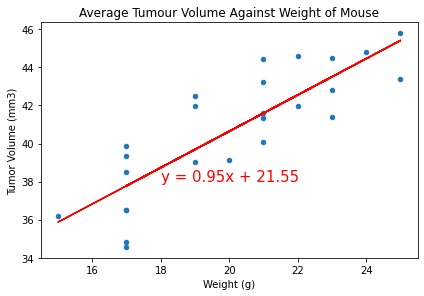

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Plot scatter for Capomulin
cap_mice_avg.plot(kind = "scatter", x = "Weight (g)", y = "Tumor Volume (mm3)")
c_x = cap_mice_avg["Weight (g)"]
c_y = cap_mice_avg["Tumor Volume (mm3)"]

#Calc regression line
c_slope, c_int, c_r, c_p, c_std_err = st.linregress(c_x, c_y)
c_fit = c_slope * c_x + c_int
line_eq = "y = " + str(round(c_slope,2)) + "x + " + str(round(c_int,2))

#Plot regression line 
plt.plot(c_x,c_fit,"r-")
plt.annotate(line_eq,(18,38),fontsize=15,color="red")

plt.tight_layout()
plt.title("Average Tumour Volume Against Weight of Mouse")